In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
df = pd.read_csv("./train.csv").iloc[:, :-2]
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,T,RH,Gas,Value
0,2016-03-15,12.020833,54.883334,CO,1053.200000
1,2016-03-16,9.833333,64.069791,CO,995.250000
2,2016-03-17,11.292708,51.107292,CO,1025.250000
3,2016-03-18,12.866319,51.530903,CO,1064.444444
4,2016-03-19,16.016667,48.843750,CO,1088.741667


In [102]:
df.set_index('Date', inplace=True)
df.head()

,T,RH,Gas,Value
Date,,,,
2016-03-15,12.020833,54.883334,CO,1053.200000
2016-03-16,9.833333,64.069791,CO,995.250000
2016-03-17,11.292708,51.107292,CO,1025.250000
2016-03-18,12.866319,51.530903,CO,1064.444444
2016-03-19,16.016667,48.843750,CO,1088.741667


In [20]:
df.Gas.unique()

array(['CO', 'HC', 'NO2', 'O3'], dtype=object)

In [55]:
dfCO = df.loc[df['Gas']=='CO']
dfHC = df.loc[df['Gas']=='HC']
dfNO2 = df.loc[df['Gas']=='NO2']
dfO3 = df.loc[df['Gas']=='O3']

dfT = dfCO["T"]
dfRH = dfCO["RH"]

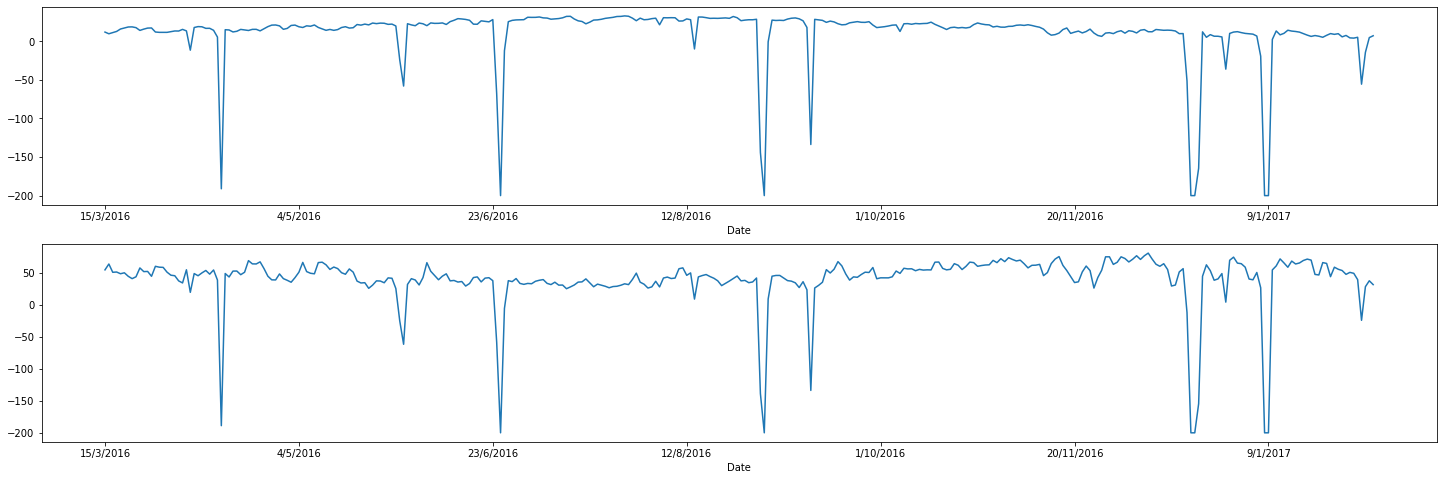

In [56]:
fig, ax = plt.subplots(2, 1, figsize=(25,8))
dfT.plot(ax=ax[0])
dfRH.plot(ax=ax[1])
plt.show()

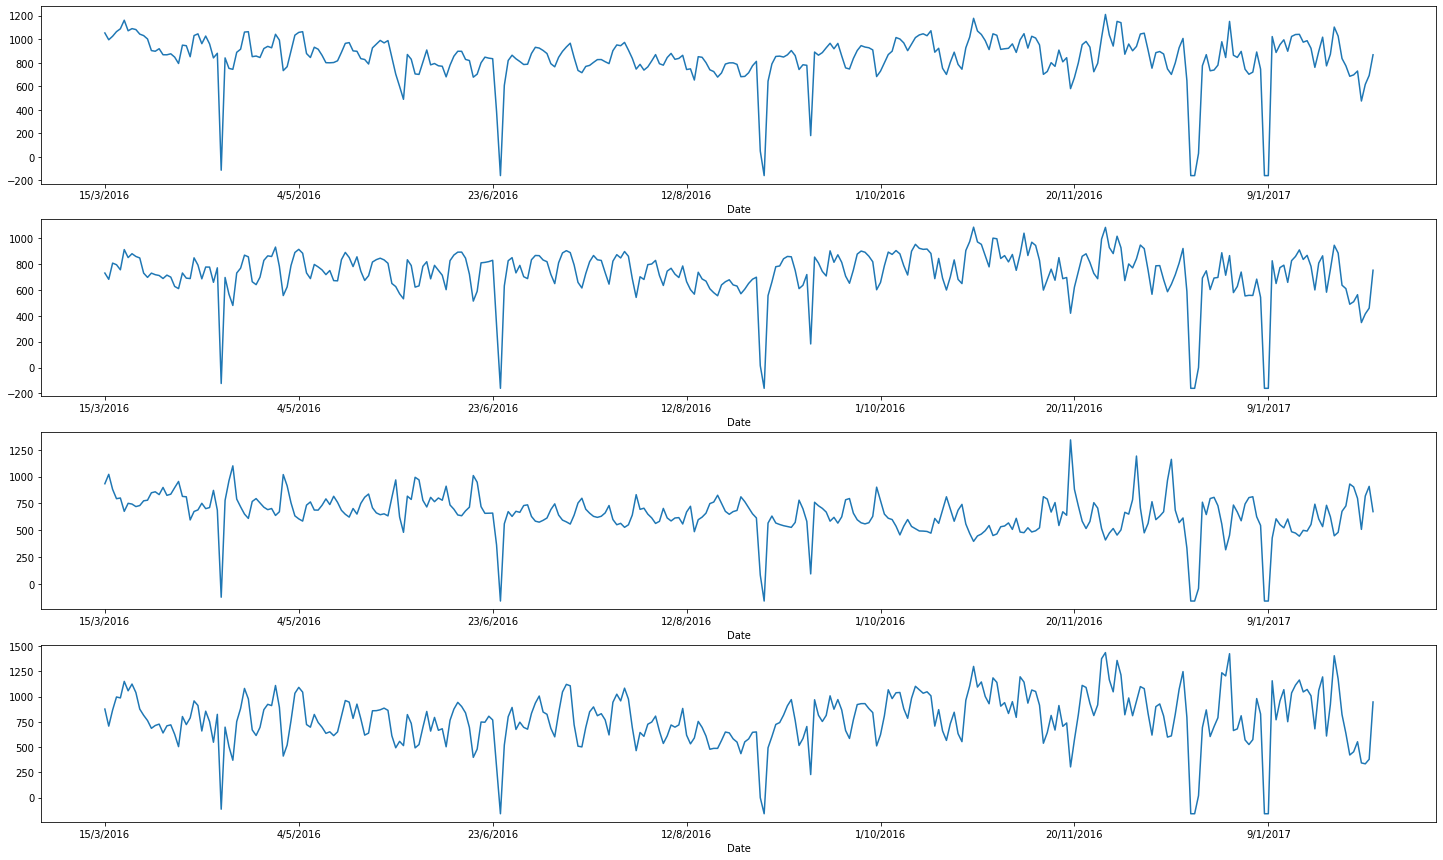

In [57]:
fig, ax = plt.subplots(4, 1, figsize=(25,15))
dfCO['Value'].plot(ax=ax[0])
dfHC['Value'].plot(ax=ax[1])
dfNO2['Value'].plot(ax=ax[2])
dfO3['Value'].plot(ax=ax[3])
plt.show()

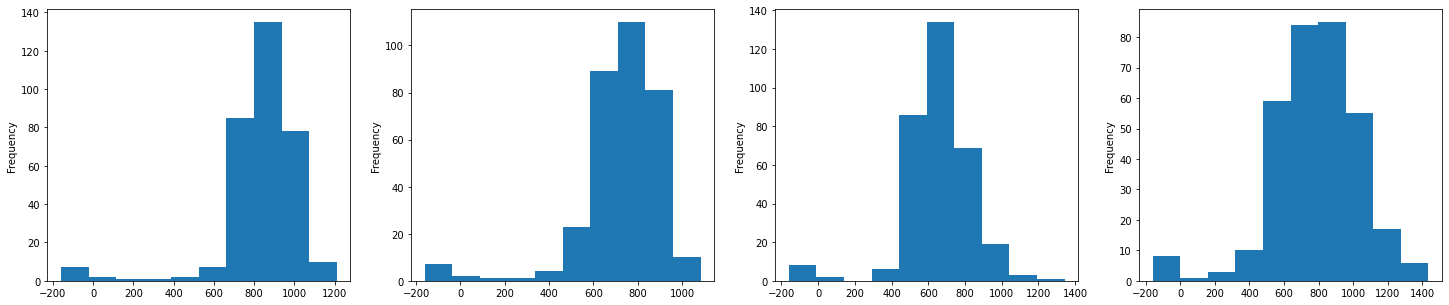

In [58]:
fig, ax = plt.subplots(1, 4, figsize=(25,5))
dfCO['Value'].plot(ax=ax[0], kind='hist')
dfHC['Value'].plot(ax=ax[1], kind='hist')
dfNO2['Value'].plot(ax=ax[2], kind='hist')
dfO3['Value'].plot(ax=ax[3], kind='hist')
plt.show()

In [69]:
CO1 = dfCO.iloc[:len(dfCO)//2,]['Value']
CO2 = dfCO.iloc[len(dfCO)//2:,]['Value']
print(f'For carbon monoxide, group 1 mean = {CO1.mean():.2f}, group 2 mean = {CO2.mean():.2f}, \ngroup 1 variance = {CO1.var():.2f}, group 2 variance = {CO2.var():.2f}\n')

HC1 = dfHC.iloc[:len(dfHC)//2,]['Value']
HC2 = dfHC.iloc[len(dfHC)//2:,]['Value']
print(f'For hydrocarbon, group 1 mean = {HC1.mean():.2f}, group 2 mean = {HC2.mean():.2f}, \ngroup 1 variance = {HC1.var():.2f}, group 2 variance = {HC2.var():.2f}\n')

NO21 = dfNO2.iloc[:len(dfNO2)//2,]['Value']
NO22 = dfNO2.iloc[len(dfNO2)//2:,]['Value']
print(f'For nitrogen dioxide, group 1 mean = {NO21.mean():.2f}, group 2 mean = {NO22.mean():.2f}, \ngroup 1 variance = {NO21.var():.2f}, group 2 variance = {NO22.var():.2f}\n')

O31 = dfO3.iloc[:len(dfO3)//2,]['Value']
O32 = dfO3.iloc[len(dfO3)//2:,]['Value']
print(f'For ozone, group 1 mean = {O31.mean():.2f}, group 2 mean = {O32.mean():.2f}, \ngroup 1 variance = {O31.var():.2f}, group 2 variance = {O32.var():.2f}')

For carbon monoxide, group 1 mean = 847.04, group 2 mean = 834.13, 
group 1 variance = 25346.67, group 2 variance = 58738.72

For hydrocarbon, group 1 mean = 733.29, group 2 mean = 725.89, 
group 1 variance = 20102.89, group 2 variance = 52651.93

For nitrogen dioxide, group 1 mean = 707.05, group 2 mean = 593.13, 
group 1 variance = 22504.00, group 2 variance = 46203.93

For ozone, group 1 mean = 742.15, group 2 mean = 819.08, 
group 1 variance = 39673.37, group 2 variance = 94896.35


In [42]:
df.describe()

,T,RH,Value
count,1312.000000,1312.000000,1312.000000
mean,11.634917,39.873729,750.218839
std,37.041779,43.217836,225.520132
min,-200.000000,-200.000000,-160.000000
25%,12.387760,36.348177,648.370833
50%,18.832292,46.078993,769.370833
75%,25.557118,57.932292,880.570833
max,32.997917,81.104167,1436.233333


In [43]:
df.isna().sum()

T        0
RH       0
Gas      0
Value    0
dtype: int64

<AxesSubplot:xlabel='Gas', ylabel='count'>

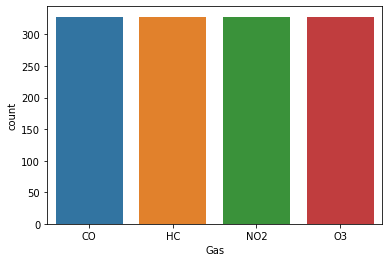

In [44]:
sns.countplot(x=df.Gas)

In [78]:
from statsmodels.tsa.stattools import adfuller

resultCO = adfuller(dfCO['Value'])
resultHC = adfuller(dfHC['Value'])
resultNO2 = adfuller(dfHC['Value'])
resultO3 = adfuller(dfHC['Value'])

print(f'CO p-value: {resultCO[1]:0.2}')
print(f'HC p-value: {resultHC[1]:0.2}')
print(f'NO2 p-value: {resultNO2[1]:0.2}')
print(f'O3 p-value: {resultO3[1]:0.2}')

CO p-value: 2.7e-16
HC p-value: 1.3e-16
NO2 p-value: 1.3e-16
O3 p-value: 1.3e-16


<AxesSubplot:xlabel='Date'>

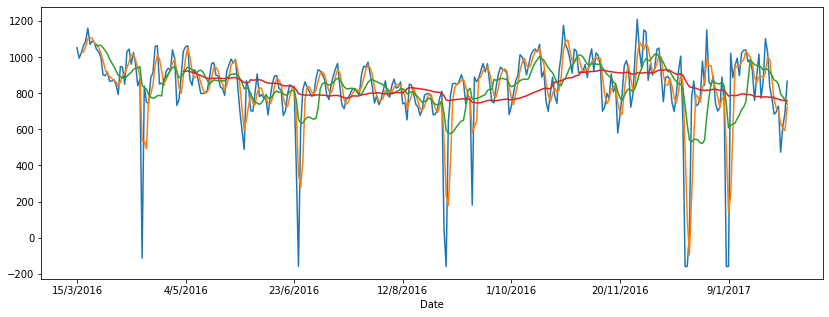

In [119]:
dfCO['Value'].plot(figsize=(14,5))
dfCO['Value'].rolling(window=3).mean().plot()
dfCO['Value'].rolling(window=10).mean().plot()
dfCO['Value'].rolling(window=50).mean().plot()